# Practice assignment: Handling categorical data

In this programming assignment, you are going to work with the following dataset from Kaggle:

https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

This assignment is graded by your `submission.json`.

The cell below creates a valid `submission.json` file, fill your answers in there. 

You can press "Submit Assignment" at any time to submit partial progress.

In [542]:
%%file submission.json
{
    "q1": 10,
    "q2": 123,
    "q3": 8,
    "q4": 23,
    "q5": 2.06,
    "q6": 0.72,
    "q7": 42824,
    "q8": 38702,
    "q9": 1709.79643,
    "q10": 0.36407,
    "q11": 0.45383,
    "q12": 0.26772,
    "q13": 0.24935,
    "q14": -0.40878,
    "q15": 0.18200,
    "q16": "major_discipline",
    "q17": 0.72
}

Overwriting submission.json


## Dataset description

Suppose that a company working with Big Data and Data Science wants to hire data scientists among people who have successfully passed some courses conducted by the company. Many people sign up for their training. The company wants to focus of the candidates who really want to work for them after training. Information related to demographics, education, experience is provided by the candidates via a sign-up form.

This dataset is designed to understand the factors that lead a person to leave current job which is useful for HR researches. Based on the provided data, you are going to predict whether a candidate is looking for a job change.

The whole data is divided into train and test parts. Data contains several categorical features – they need to be encoded.

## Feature description

- `enrollee_id`: Unique ID for a candidate
- `city`: City code
- `city_development_index`: Developement index of the city (scaled)
- `gender`: Gender of a candidate
- `relevent_experience`: Relevant experience of a candidate
- `enrolled_university`: Type of University course enrolled in if any
- `education_level`: Education level of a candidate
- `major_discipline`: Education major discipline of a candidate
- `experience`: Candidate total experience in years
- `company_size`: Number of employees in a current employer's company
- `company_type`: Type of a current employer
- `last_new_job`: Difference in years between previous and current jobs
- `training_hours`: training hours completed
- `target`: 0 – Not looking for job change, 1 – Looking for a job change


In [439]:
import numpy as np
import pandas as pd

In [440]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 1

Before modifying the features, let's study our dataframe a bit. First, call `.dtypes` for `train` dataframe. 

**q1:** How many columns in `train` contain data types different from numbers (ints and floats)?

In [441]:
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [442]:
train.dtypes.value_counts()

object     10
float64     2
int64       2
dtype: int64

## 2

**q2:** How many unique caterogies does a feature `'city'` contain in the train data?

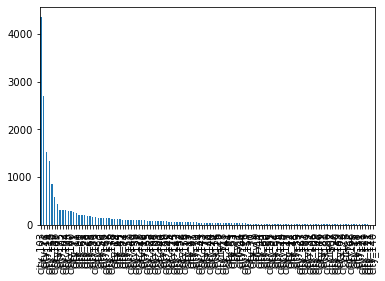

In [443]:
train['city'].value_counts().plot(kind='bar')

In [444]:
train['city'].nunique()

123

## 3

**q3:** How many features in train data contain missing values (NaN)?

In [445]:
train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [446]:
len(train.columns[train.isna().any()])

8

## 4

Some features have a relatively small number of missing values. For instance, `'experience'` has only 65 missing values in the train data. Replacing these missing values with a special category might introduce bias to the data. However, since the number of missing values is not so big, we might be OK with it.

Replace missing values in `'experience'` feature with a category -1.

**q4:** How many categories does this feature contain in the train data now?

_(hint: you might want to use `fillna` function from `pandas` library in this task, but remember that it's not an in-place function by default. Or you can use `SimpleImputer` from `sklearn`)_

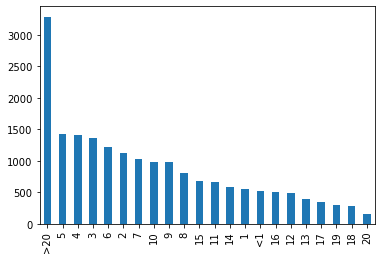

In [447]:
train['experience'].value_counts().plot(kind='bar')

In [448]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan, strategy='constant', fill_value='-1')
imputer = imputer.fit(train[['experience']])

train['experience'] = imputer.transform(train[['experience']]).ravel()

In [449]:
train['experience'].isna().sum()

0

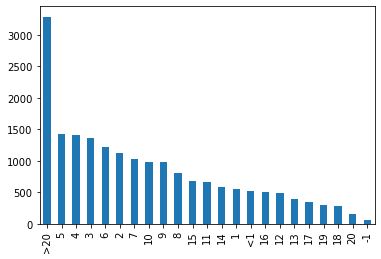

In [450]:
train['experience'].value_counts().plot(kind='bar')

In [451]:
train['experience'].nunique()

23

## 5

`'education_level'` is an example of an ordinal feature. Sure, we can define an order on it. For instance, `'High School'` is "bigger" than `'Primary School'`, and `'Phd'` is "bigger" than '`Graduate'`. We can encode this feature with integer numbers in a correct order.

In this task, apply a correct mapping for the values of `'education_level'` feature. The mapping should be the following:

* `'Primary School'` -> 0
* `'High School'` -> 1
* `'Graduate'` -> 2
* `'Masters'` -> 3
* `'Phd'` -> 4

At the same time, impute missing values in `'education_level'` with a new category -1. So another part of the mapping would be:

* `np.nan` -> -1

**q5:** What will be the mean value of this feature in the train data after the encoding? Provide the answer, rounded to the nearest TWO decimal places (e.g. 12.3456789 -> 12.35).

_(hint: you might want to use `map` function from `pandas` in this task)_

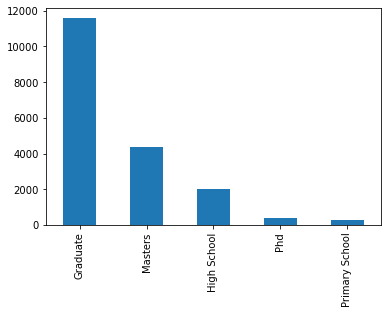

In [452]:
train['education_level'].value_counts().plot(kind='bar')

In [453]:
map_education = {np.nan           : -1, 
                 'Primary School' :  0,
                 'High School'    :  1,
                 'Graduate'       :  2,
                 'Masters'        :  3,
                 'Phd'            :  4}

train['education_level'] = train['education_level'].replace(map_education)

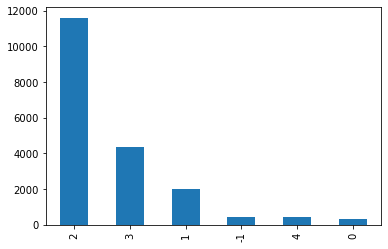

In [454]:
train['education_level'].value_counts().plot(kind='bar')

In [455]:
round(train['education_level'].mean(), 2)

2.06

## 6

Feature `'relevent_experience'` is an example of a binary feature. You can also check that it has no missing values, which makes its encoding pretty easy.

Encode this feature with the following mapping:

*   `"No relevent experience"` -> 0
*   `"Has relevent experience"` -> 1

**q6:** What will be the mean value of this feature in the train data after the encoding? Provide the answer, rounded to the nearest TWO decimal places (e.g. 12.3456789 -> 12.35).

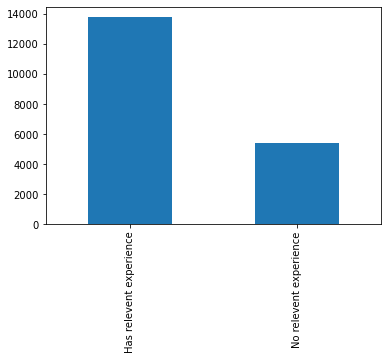

In [456]:
train['relevent_experience'].value_counts().plot(kind='bar')

In [457]:
train['relevent_experience'].isna().sum()

0

In [458]:
map_relevent_experience = {'No relevent experience': 0, 'Has relevent experience': 1}
train['relevent_experience'] = train['relevent_experience'].replace(map_relevent_experience)

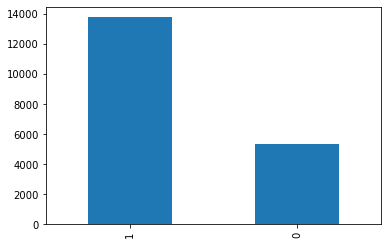

In [459]:
train['relevent_experience'].value_counts().plot(kind='bar')

In [460]:
round(train['relevent_experience'].mean(), 2)

0.72

## 7

In our case, `'gender'` is an example of a nominal feature (notice that it is not a binary feature cause it contains three categories + NaNs). We will use One-Hot encoding to encode it. There are several options how to do it in practice: for example, to use `get_dummies` function from `pandas` or `OneHotEncoder` from `sklearn.preprocessing`. Here, we will go with the first option.

If you want to encode a whole dataset with One-Hot encoding, you can directly pass it into the discussed methods. But here we want to encode only one feature. We suggest to do it in four steps:

1. Obtain a One-Hot encoding dataframe for the feature `'gender'`: apply `pd.get_dummies` to this feature. As a result, you should obtain a dataframe with three features (three different categories for gender). Don't include `'NaN'` feature - it will already be included as the encoding (0, 0, 0).
2. Change the column names of this dataframe, so that a feature `'<category_name>'` will become `'gender-<category_name>'`. Of course, it is not a necessary step in general. However, it probably would be more convenient to work with a full dataframe if we remember that these One-Hot encoded features originally came from the feature `'gender'`. On a technical side, you can perform it by changing `df_gender.columns` list.
3. Concatenate original and new dataframes. You can do it by calling `pd.concat` function. Don't forget to set `'axis'` parameter, so that you concatenate dataframes by columns, not by rows. As a result of this step, you should obtain a new `train` dataframe with three new columns named like `'gender-<category_name>'`.
4. Finally, drop `'gender'` feature because we have already encoded it.

As a result of these four steps, you should obtain a new version of `train` dataframe, with dropped `'gender'` feature and three new features named like `'gender-<category_name>'`. A total number of columns by this time should be equal to 16.

**q7:** What is the total number of zero values which appear in the columns starting with `'gender-'`?

_Example: suppose that you obtain the following dataframe:_

| gender-category1 | gender-category2   | gender-category3|
|------|------|------|
|   0  | 1| 0|
|0|0|0|

_Then the answer for the question above should be 5._



1. Obtain a One-Hot encoding dataframe for the feature `'gender'`: apply `pd.get_dummies` to this feature. As a result, you should obtain a dataframe with three features (three different categories for gender). Don't include `'NaN'` feature - it will already be included as the encoding (0, 0, 0).

In [461]:
gender_df = pd.get_dummies(train['gender'])
gender_df.head(5)

,Female,Male,Other
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0


2. Change the column names of this dataframe, so that a feature `'<category_name>'` will become `'gender-<category_name>'`. Of course, it is not a necessary step in general. However, it probably would be more convenient to work with a full dataframe if we remember that these One-Hot encoded features originally came from the feature `'gender'`. On a technical side, you can perform it by changing `df_gender.columns` list.

In [462]:
gender_df = gender_df.add_prefix('gender_')
gender_df.columns = gender_df.columns.str.strip().str.lower()
gender_df.head(5)

,gender_female,gender_male,gender_other
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0


3. Concatenate original and new dataframes. You can do it by calling pd.concat function. Don't forget to set 'axis' parameter, so that you concatenate dataframes by columns, not by rows. As a result of this step, you should obtain a new train dataframe with three new columns named like 'gender-<category_name>'.

In [463]:
train_concat = pd.concat([train, gender_df], axis=1)
train_concat.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_female,gender_male,gender_other
0,28120,city_16,0.910,NaN,1,no_enrollment,1,NaN,19,100-500,Pvt Ltd,2,20,0.0,0,0,0
1,31820,city_21,0.624,NaN,0,no_enrollment,3,STEM,2,50-99,Early Stage Startup,1,10,1.0,0,0,0
2,4277,city_71,0.884,Male,1,Part time course,2,STEM,>20,NaN,NaN,2,6,1.0,0,1,0
3,3379,city_159,0.843,Male,1,no_enrollment,3,STEM,>20,<10,Pvt Ltd,>4,56,0.0,0,1,0
4,10821,city_16,0.910,Male,1,no_enrollment,3,STEM,6,NaN,NaN,4,15,0.0,0,1,0


4. Finally, drop 'gender' feature because we have already encoded it.

In [464]:
train_concat = train_concat.drop(['gender'], axis=1)
train_concat.head(5)

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_female,gender_male,gender_other
0,28120,city_16,0.910,1,no_enrollment,1,NaN,19,100-500,Pvt Ltd,2,20,0.0,0,0,0
1,31820,city_21,0.624,0,no_enrollment,3,STEM,2,50-99,Early Stage Startup,1,10,1.0,0,0,0
2,4277,city_71,0.884,1,Part time course,2,STEM,>20,NaN,NaN,2,6,1.0,0,1,0
3,3379,city_159,0.843,1,no_enrollment,3,STEM,>20,<10,Pvt Ltd,>4,56,0.0,0,1,0
4,10821,city_16,0.910,1,no_enrollment,3,STEM,6,NaN,NaN,4,15,0.0,0,1,0


In [465]:
train = train_concat

In [466]:
len(train[train['gender_female'] == 0]) + \
len(train[train['gender_male'] == 0]) + \
len(train[train['gender_other'] == 0])

42824

## 8

Perform One-Hot encoding for the feature `'enrolled_university'`, using the similar procedure as in the previous task:

1. Obtain a One-Hot encoding dataframe for `'enrolled_university'`.
2. Rename its columns.
3. Concatenate original and One-Hot encoding dataframes.
4. Drop `'enrolled_university'` column.

A total number of columns by this time should be equal to 18.

**q8:** What is the total number of zero values which appear in the columns starting with `'enrolled_university-'`?

In [467]:
university_df = pd.get_dummies(train['enrolled_university'])

university_df = university_df.add_prefix('enrolled_university_')
university_df.columns = university_df.columns.str.strip().str.lower()
university_df.columns = university_df.columns.str.replace(' ', '_')

train_concat = pd.concat([train, university_df], axis=1)
train_concat = train_concat.drop(['enrolled_university'], axis=1)

train_concat.head()

,enrollee_id,city,city_development_index,relevent_experience,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_female,gender_male,gender_other,enrolled_university_full_time_course,enrolled_university_part_time_course,enrolled_university_no_enrollment
0,28120,city_16,0.910,1,1,NaN,19,100-500,Pvt Ltd,2,20,0.0,0,0,0,0,0,1
1,31820,city_21,0.624,0,3,STEM,2,50-99,Early Stage Startup,1,10,1.0,0,0,0,0,0,1
2,4277,city_71,0.884,1,2,STEM,>20,NaN,NaN,2,6,1.0,0,1,0,0,1,0
3,3379,city_159,0.843,1,3,STEM,>20,<10,Pvt Ltd,>4,56,0.0,0,1,0,0,0,1
4,10821,city_16,0.910,1,3,STEM,6,NaN,NaN,4,15,0.0,0,1,0,0,0,1


In [468]:
train = train_concat

In [469]:
len(train[train['enrolled_university_full_time_course'] == 0]) + \
len(train[train['enrolled_university_part_time_course'] == 0]) + \
len(train[train['enrolled_university_no_enrollment'] == 0])

38702

## 9

Encode feature `'city'` using frequency encoding. You should map each category `'city_i'` to its count (a total number of observations in `train` with `city == 'city_i'`). Save this mapping, since later you would apply the same mapping to the test data.

As a result of this task, feature `'city'` should be encoded with category counts in `train`. 

**q9:** What will be the mean value of this feature in the train data after the encoding? Provide the answer, rounded to the nearest FIVE decimal places (e.g. 12.3456789 -> 12.34568).


In [470]:
def get_map_city(df, city):
    city_cnt = len(df[df['city'] == city])
    return city_cnt

In [471]:
map_city = dict(
    zip(
        list(train['city'].unique()),
        [get_map_city(train, v) for v in list(train['city'].unique())]
    )
)

In [472]:
train['city_freq'] = train['city'].replace(map_city)

In [473]:
train = train.drop(['city'], axis=1)

In [474]:
train.head()

,enrollee_id,city_development_index,relevent_experience,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_female,gender_male,gender_other,enrolled_university_full_time_course,enrolled_university_part_time_course,enrolled_university_no_enrollment,city_freq
0,28120,0.910,1,1,NaN,19,100-500,Pvt Ltd,2,20,0.0,0,0,0,0,0,1,1533
1,31820,0.624,0,3,STEM,2,50-99,Early Stage Startup,1,10,1.0,0,0,0,0,0,1,2702
2,4277,0.884,1,2,STEM,>20,NaN,NaN,2,6,1.0,0,1,0,0,1,0,266
3,3379,0.843,1,3,STEM,>20,<10,Pvt Ltd,>4,56,0.0,0,1,0,0,0,1,94
4,10821,0.910,1,3,STEM,6,NaN,NaN,4,15,0.0,0,1,0,0,0,1,1533


In [475]:
round(train['city_freq'].mean(), 5)

1709.79643

## 10

Encode feature `'last_new_job'` with target encoding with no modifications. First, impute missing values in this feature with a new category `'-1'`. Then, map each category of `'last_new_job'` to the mean target value of the observations with the corresponding category. Save this mapping, since later you would apply the same mapping to the test data.

**q10:** What will be the maximum value of this feature in the train data after the encoding? Provide the answer, rounded to the nearest FIVE decimal places (e.g. 12.3456789 -> 12.35).

_(hint: you might want to use `groupby` function from `pandas` in this task)_

In [476]:
train['last_new_job'].isna().sum()

423

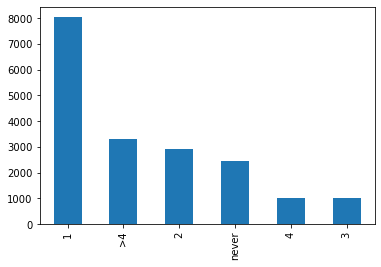

In [477]:
train['last_new_job'].value_counts().plot(kind='bar')

In [478]:
map_last_new_job = {np.nan: '-1'}
train['last_new_job'] = train['last_new_job'].replace(map_last_new_job)

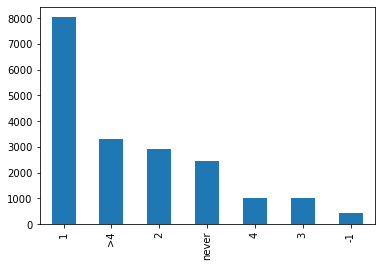

In [479]:
train['last_new_job'].value_counts().plot(kind='bar')

In [480]:
def map_target(df, column_name, value):
    a = len(df[df[column_name] == value])
    b = len(df.loc[(df[column_name] == value) & (df['target'] == 1.0)])
    
    if a == 0:
        return 0
    
    return b / a

In [481]:
map_last_new_job = dict(
    zip(
        list(train['last_new_job'].unique()),
        [map_target(train, 'last_new_job', v) for v in list(train['last_new_job'].unique())]
    )
)

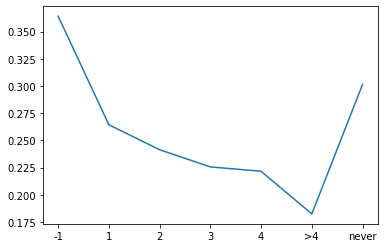

In [482]:
import matplotlib.pyplot as plt


plt.plot(*zip(*sorted(map_last_new_job.items())))
plt.show()

In [483]:
train['last_new_job_target'] = train['last_new_job'].replace(map_last_new_job)

In [484]:
train = train.drop(['last_new_job'], axis=1)

In [485]:
train.head()

,enrollee_id,city_development_index,relevent_experience,education_level,major_discipline,experience,company_size,company_type,training_hours,target,gender_female,gender_male,gender_other,enrolled_university_full_time_course,enrolled_university_part_time_course,enrolled_university_no_enrollment,city_freq,last_new_job_target
0,28120,0.910,1,1,NaN,19,100-500,Pvt Ltd,20,0.0,0,0,0,0,0,1,1533,0.241379
1,31820,0.624,0,3,STEM,2,50-99,Early Stage Startup,10,1.0,0,0,0,0,0,1,2702,0.264303
2,4277,0.884,1,2,STEM,>20,NaN,NaN,6,1.0,0,1,0,0,1,0,266,0.241379
3,3379,0.843,1,3,STEM,>20,<10,Pvt Ltd,56,0.0,0,1,0,0,0,1,94,0.182371
4,10821,0.910,1,3,STEM,6,NaN,NaN,15,0.0,0,1,0,0,0,1,1533,0.221574


In [486]:
round(train['last_new_job_target'].max(), 5)

0.36407

## 11

Encode feature `'experience'` with M-estimate encoding. Map each category of `'experience'` according to the following formula:

$$
\hat{x_{ij}} = \frac{\text{target}\left(j, x_{ij}\right) + m\times y_{\text{mean}}}{\text{count}\left(j, x_{ij}\right) + m}\quad,
$$

where

* $x_{ij}$ is a category being encoded,
* $\hat{x_{ij}}$ is its corresponding M-estimate encoding value,
* $\text{count}\left(j, x_{ij}\right)$ is a total number of times $x_{ij}$ appeared in `train`,
* $\text{target}\left(j, x_{ij}\right)$ is a mean target value of the observations with the corresponding category,
* $m$ is a parameter.

In this task, set $m = 0.5$. 

**q11:** What will be the maximum value of this feature in the train data after the encoding? Provide the answer, rounded to the nearest FIVE decimal places (e.g. 12.3456789 -> 12.34568).

In [487]:
train['experience'].isna().sum()

0

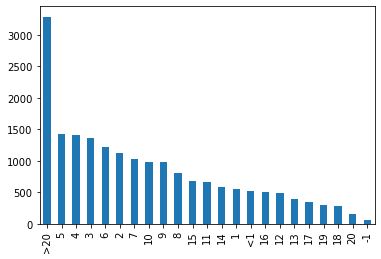

In [488]:
train['experience'].value_counts().plot(kind='bar')

In [489]:
def m_estimate_encoding(df, category, m=0.5):
    target_cat = df.loc[(df['experience'] == category)]['target'].sum()
    count_cat  = df.loc[(df['experience'] == category)]['target'].count()
    y_mean     = df['target'].mean()
    
    return (target_cat + m * y_mean) / (count_cat + m)

In [490]:
map_experience = dict(
    zip(
        list(train['experience'].unique()),
        [m_estimate_encoding(train, category) for category in list(train['experience'].unique())]
    )
)

In [491]:
train['experience_m_estimate_encoded'] = train['experience'].replace(map_experience)

In [492]:
train = train.drop(['experience'], axis=1)

In [493]:
train.head()

,enrollee_id,city_development_index,relevent_experience,education_level,major_discipline,company_size,company_type,training_hours,target,gender_female,gender_male,gender_other,enrolled_university_full_time_course,enrolled_university_part_time_course,enrolled_university_no_enrollment,city_freq,last_new_job_target,experience_m_estimate_encoded
0,28120,0.910,1,1,NaN,100-500,Pvt Ltd,20,0.0,0,0,0,0,0,1,1533,0.241379,0.174465
1,31820,0.624,0,3,STEM,50-99,Early Stage Startup,10,1.0,0,0,0,0,0,1,2702,0.264303,0.331818
2,4277,0.884,1,2,STEM,NaN,NaN,6,1.0,0,1,0,0,1,0,266,0.241379,0.153088
3,3379,0.843,1,3,STEM,<10,Pvt Ltd,56,0.0,0,1,0,0,0,1,94,0.182371,0.153088
4,10821,0.910,1,3,STEM,NaN,NaN,15,0.0,0,1,0,0,0,1,1533,0.221574,0.282059


In [494]:
round(train['experience_m_estimate_encoded'].max(), 5)

0.45383

## 12

Encode feature `'major_discipline'` with Leave-One-Out encoding. Remember that this technique is similar to target encoding, but here while computing the encoding for a particular observation, we exclude it from the target encoding formula. Therefore a category $x_{ij}$ for the $i$-th observation will be encoded according to the following formula:

$$
\hat{x_{ij}} = \frac{\text{target}\left(j, x_{ij}\right) - y_i}{\text{count}\left(j, x_{ij}\right) - 1}\quad,
$$

where

* $\hat{x_{ij}}$ is its corresponding M-estimate encoding value,
* $\text{count}\left(j, x_{ij}\right)$ is a total number of times $x_{ij}$ appeared in `train`,
* $\text{target}\left(j, x_{ij}\right)$ is a mean target value of the observations with the corresponding category,
* $y_i$ is a target value of the $i$-th observation

For example, suppose that you have the following train data:

|feature|target|
|-|-|
|A|1|
|A|0|
|B|1|
|B|0|
|A|0|

Then you obtain the following Leave-One-Out encoding:

|feature|feature_loo_encoded|
|-|-|
|A|0.0|
|A|0.5|
|B|0.0|
|B|1.0|
|A|0.5|

It is very important to notice that in this method the same category can be encoded differently for different observations. Thus, after encoding the train part of data, you should create a mapping which will help to encode the test data. In order to do this, simply average train encoding values within each category to obtain the final encoding. For instance, suppose that you obtain the following train dataframe:

|feature|feature_loo_encoded|
|-|-|
|A|0.2|
|A|0.6|
|B|0.3|
|B|0.7|
|A|0.4|

Then, for the test data, you should obtain the following mapping:

* A -> 0.4 (because 0.4 is a mean value of the encoded values for the category A)
* B -> 0.5 (because 0.5 is a mean value of the encoded values for the category B)

Don't impute any missing values in this task. After completing this task, drop the feature `'major_discipline'` and rename `'major_discipline_loo_encoded'` to `'major_discipline'`.

**q12:** What will be the maximum value of the encoding values for `'major_discipline'` for the TEST data in the mapping described above? Provide the answer, rounded to the nearest FIVE decimal places (e.g. 12.3456789 -> 12.34568).

In [495]:
train['major_discipline'].isna().sum()

2813

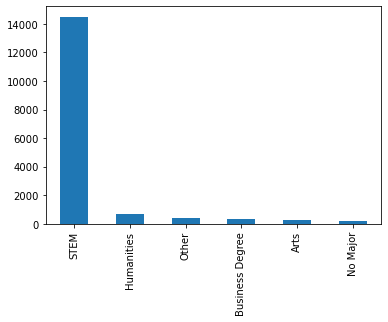

In [496]:
train['major_discipline'].value_counts().plot(kind='bar')

In [497]:
map_discipline_target = dict(
    zip(
        list(train['major_discipline'].unique()),
        [train.loc[(train['major_discipline'] == c)]['target'].sum() for c in list(train['major_discipline'].unique())]
    )
)

In [498]:
map_discipline_count = dict(
    zip(
        list(train['major_discipline'].unique()),
        [train.loc[(train['major_discipline'] == c)]['target'].count() for c in list(train['major_discipline'].unique())]
    )
)

In [499]:
def loo_estimate_encodeing(category, y):
    return (map_discipline_target[category] - y) / (map_discipline_count[category] - 1)

In [500]:
train['major_discipline_loo_encoded'] = train.apply(lambda row: loo_estimate_encodeing(row['major_discipline'], row['target']), axis=1)

In [501]:
train.head()

,enrollee_id,city_development_index,relevent_experience,education_level,major_discipline,company_size,company_type,training_hours,target,gender_female,gender_male,gender_other,enrolled_university_full_time_course,enrolled_university_part_time_course,enrolled_university_no_enrollment,city_freq,last_new_job_target,experience_m_estimate_encoded,major_discipline_loo_encoded
0,28120,0.910,1,1,NaN,100-500,Pvt Ltd,20,0.0,0,0,0,0,0,1,1533,0.241379,0.174465,-0.000000
1,31820,0.624,0,3,STEM,50-99,Early Stage Startup,10,1.0,0,0,0,0,0,1,2702,0.264303,0.331818,0.261542
2,4277,0.884,1,2,STEM,NaN,NaN,6,1.0,0,1,0,0,1,0,266,0.241379,0.153088,0.261542
3,3379,0.843,1,3,STEM,<10,Pvt Ltd,56,0.0,0,1,0,0,0,1,94,0.182371,0.153088,0.261611
4,10821,0.910,1,3,STEM,NaN,NaN,15,0.0,0,1,0,0,0,1,1533,0.221574,0.282059,0.261611


In [502]:
map_major_discipline = dict(train.groupby('major_discipline')['major_discipline_loo_encoded'].mean())

In [503]:
train = train.drop(['major_discipline'], axis=1)
train.rename(columns={'major_discipline_loo_encoded':'major_discipline'}, inplace=True)

In [504]:
train.head()

,enrollee_id,city_development_index,relevent_experience,education_level,company_size,company_type,training_hours,target,gender_female,gender_male,gender_other,enrolled_university_full_time_course,enrolled_university_part_time_course,enrolled_university_no_enrollment,city_freq,last_new_job_target,experience_m_estimate_encoded,major_discipline
0,28120,0.910,1,1,100-500,Pvt Ltd,20,0.0,0,0,0,0,0,1,1533,0.241379,0.174465,-0.000000
1,31820,0.624,0,3,50-99,Early Stage Startup,10,1.0,0,0,0,0,0,1,2702,0.264303,0.331818,0.261542
2,4277,0.884,1,2,NaN,NaN,6,1.0,0,1,0,0,1,0,266,0.241379,0.153088,0.261542
3,3379,0.843,1,3,<10,Pvt Ltd,56,0.0,0,1,0,0,0,1,94,0.182371,0.153088,0.261611
4,10821,0.910,1,3,NaN,NaN,15,0.0,0,1,0,0,0,1,1533,0.221574,0.282059,0.261611


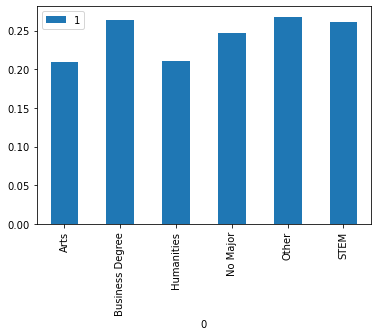

In [505]:
df = pd.DataFrame(map_major_discipline.items())
df.set_index(0, inplace=True)
df.plot(kind='bar')

In [506]:
map_major_discipline

{'Arts': 0.20948616600790554,
 'Business Degree': 0.2629969418960245,
 'Humanities': 0.2107623318385635,
 'No Major': 0.24663677130044762,
 'Other': 0.2677165354330713,
 'STEM': 0.2615926028153871}

## 13

Encode feature `'company_size'` with Catboost encoding. The technique was described in the lecture. Here, for the sake of simplicity, let's use the implementation from `category_encoders` library.

As you may remember, Catboost encoding depends on how the data is ordered. Normally, you should shuffle the data one time or even several times. In this task, we will assume that the data has already been shuffled, so you don't need to shuffle it again.

Take `CatBoostEncoder` and use the default values for all its parameters, except `handle_missing` - set it to `'return_nan'` so that your encoder don't do anything with missing values. Fit it on the `'company_size'` (train data) and `'target'` and transform this feature. Save the encoder - it will be used later to transform this feature in test data.

Don't impute any missing values in this task.

**q13:** What will be the most popular value of this feature in the train data after the encoding? Provide the answer, rounded to the nearest FIVE decimal places (e.g. 12.3456789 -> 12.34568).

In [507]:
train['company_size'].isna().sum()

5938

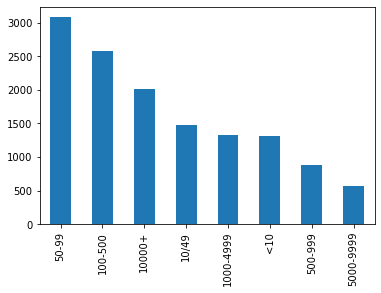

In [508]:
train['company_size'].value_counts().plot(kind='bar')

In [509]:
from category_encoders.cat_boost import CatBoostEncoder

cbe_enc = CatBoostEncoder(handle_missing = 'return_nan')
train['company_size'] = cbe_enc.fit_transform(train['company_size'], train['target'])

In [510]:
enc

CatBoostEncoder(cols=['company_size'], handle_missing='return_nan')

In [511]:
round(train['company_size'].value_counts().index[0], 5)

0.24935

## 14

Encode feature `'company_type'` with Weight of Evidence (WoE) encoding. A category $x_{ij}$ will be encoded according to the following formula:

$$
\hat{x_{ij}} = \ln\left(\frac{\mathbb{P}\left(x_{ij}\mid y=1\right)}{\mathbb{P}\left(x_{ij}\mid y=0\right)}\right)\quad.
$$

Here:

$$
\mathbb{P}\left(x_{ij}\mid y=1\right) = \frac{\text{count}\left(y=1\mid x_{ij}\right)}{\text{count}\left(y=1\right)}
$$
$$
\mathbb{P}\left(x_{ij}\mid y=0\right) = \frac{\text{count}\left(y=0\mid x_{ij}\right)}{\text{count}\left(y=0\right)}
$$

The notation means the following:

* $\text{count}\left(y=1\mid x_{ij}\right)$ denotes the number of observations with the category $x_{ij}$ where the target value is equal to $1$;
* $\text{count}\left(y=0\mid x_{ij}\right)$ denotes the same but for the target value $0$;
* $\text{count}\left(y=1\right)$ denotes the number of observations with the target value equal to $1$;
* $\text{count}\left(y=0\right)$ denotes the same but for the target value $0$.


For example, suppose that you have the following train data:

|feature|target|
|-|-|
|A|1|
|A|0|
|B|1|
|B|0|
|A|0|

Then you obtain the following WoE encoding mapping:

* A -> $\ln\left(\frac{\frac{1}{2}}{\frac{2}{3}}\right) \approx -0.288$ 
* B -> $\ln\left(\frac{\frac{1}{2}}{\frac{1}{3}}\right) \approx 0.405$ 

Don't impute any missing values in this task.

**q14:** What will be the most popular value of this feature in the train data after the encoding? Provide the answer, rounded to the nearest FIVE decimal places (e.g. 12.3456789 -> 12.34568).

In [512]:
def get_p_by_category(df, category, target: float):
    a = len(df.loc[(df['company_type'] == category) & (df['target'] == target)])
    b = len(df.loc[df['target'] == target])
        
    if b == 0:
        return 0
    
    return a / b

In [513]:
def woe_encoding(df, category):
    p1 = get_p_by_category(df, category, 1.0)
    p2 = get_p_by_category(df, category, 0.0)
    
    if p2 == 0.0:
        return 0.0
    
    return np.log(p1 / p2)

In [514]:
map_company_type = dict(
    zip(
        list(train['company_type'].unique()),
        [woe_encoding(train, v) for v in list(train['company_type'].unique())]
    )
)

In [515]:
train['company_type_woe_encoded'] = train['company_type'].replace(map_company_type)

In [516]:
train = train.drop(['company_type'], axis=1)

In [517]:
train.head()

,enrollee_id,city_development_index,relevent_experience,education_level,company_size,training_hours,target,gender_female,gender_male,gender_other,enrolled_university_full_time_course,enrolled_university_part_time_course,enrolled_university_no_enrollment,city_freq,last_new_job_target,experience_m_estimate_encoded,major_discipline,company_type_woe_encoded
0,28120,0.910,1,1,0.249348,20,0.0,0,0,0,0,0,1,1533,0.241379,0.174465,-0.000000,-0.408782
1,31820,0.624,0,3,0.249348,10,1.0,0,0,0,0,0,1,2702,0.264303,0.331818,0.261542,-0.075476
2,4277,0.884,1,2,NaN,6,1.0,0,1,0,0,1,0,266,0.241379,0.153088,0.261542,0.000000
3,3379,0.843,1,3,0.249348,56,0.0,0,1,0,0,0,1,94,0.182371,0.153088,0.261611,-0.408782
4,10821,0.910,1,3,NaN,15,0.0,0,1,0,0,0,1,1533,0.221574,0.282059,0.261611,0.000000


In [518]:
round(train['company_type_woe_encoded'].mode()[0], 5)

-0.40878

## 15

We have encoded all categorical features. Next, we drop `'enrollee_id'` because it is not a representative feature. After this, we split train part of data into the dataframe which contains only features (without target) and the target array.

Before training the models, we should impute the remaining missing values. You might have noticed that we didn't impute missing values for the features `'major_discipline'`, `'company_size'` and `'company_type'`. This is because the number of missing values in these features is relatively big (you can check it yourself). In practice, you might just create a special category (like `'-1'`) for each of these features before the encoding. However, in this task, let's perform the imputation using KNN approach - where we impute missing values by looking at the similar observations.

Import `KNNImputer` from `sklearn`. It works only with the dataset with numbers - this is why we didn't run it before the encoding. Set `n_neighbors=3`, and let other parameters have the default values. Fit it on the train dataframe with features, and then transform it. Notice that after the transformation we will obtain `numpy.array` - make `pandas.DataFrame` out of it with the same columns as before.

Save the KNN imputer - you will need it to process the test data. Check that there are no missing values in the train data anymore.

**q15:** What is the mean value of the `'company_size'` feature in the train data after the imputation? Provide the answer, rounded to the nearest FIVE decimal places (e.g. 12.3456789 -> 12.34568).

In [519]:
from sklearn.impute import KNNImputer

imp = KNNImputer(n_neighbors=3)
features = ['major_discipline', 'company_size', 'company_type_woe_encoded']

In [520]:
for feature in features:
    train[feature] = imp.fit_transform(train[[feature]])

In [521]:
train.head()

,enrollee_id,city_development_index,relevent_experience,education_level,company_size,training_hours,target,gender_female,gender_male,gender_other,enrolled_university_full_time_course,enrolled_university_part_time_course,enrolled_university_no_enrollment,city_freq,last_new_job_target,experience_m_estimate_encoded,major_discipline,company_type_woe_encoded
0,28120,0.910,1,1,0.249348,20,0.0,0,0,0,0,0,1,1533,0.241379,0.174465,-0.000000,-0.408782
1,31820,0.624,0,3,0.249348,10,1.0,0,0,0,0,0,1,2702,0.264303,0.331818,0.261542,-0.075476
2,4277,0.884,1,2,0.182001,6,1.0,0,1,0,0,1,0,266,0.241379,0.153088,0.261542,0.000000
3,3379,0.843,1,3,0.249348,56,0.0,0,1,0,0,0,1,94,0.182371,0.153088,0.261611,-0.408782
4,10821,0.910,1,3,0.182001,15,0.0,0,1,0,0,0,1,1533,0.221574,0.282059,0.261611,0.000000


In [522]:
round(train['company_size'].mean(), 5)

0.182

## 16

Finally, train a Random Forest classifier from `sklearn` on the train data. Set `n_estimators=500`, `max_depth=8`, `random_state=13`, and let other parameters have the default values. Check feature importances. 

**q16:** What is the name of the most important feature for this model? Provide the name of the feature.

In [523]:
X_train = train.drop(['enrollee_id', 'target'], axis=1)
y_train = train['target']

X_train.shape, y_train.shape

((19158, 16), (19158,))

In [524]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=13)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=13)

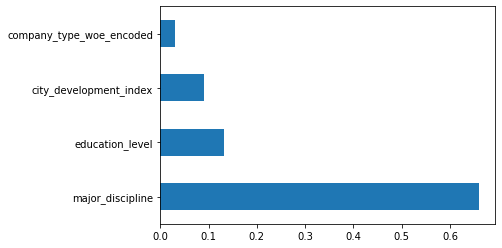

In [525]:
(pd.Series(clf.feature_importances_, index=X_train.columns)
   .nlargest(4)
   .plot(kind='barh'))

## 17

In this last task, process the test data so that it is possible to make Random Forest predictions on for it. Perform the similar operations as for the train data, but remember that now you work with test observations and therefore all operations are in the inference mode.

1. (task 4) Feature `'experience'`: impute missing values by -1. 
2. (task 5) Feature `'education_level'`: perform ordinal encoding mapping.
3. (task 6) Feature `'relevent_experience'`: perform binary mapping.
4. (task 7) Feature `'gender'`: perform One-Hot encoding and obtain three new features starting with `'gender-'`. Drop `'gender'` feature.
5. (task 8) Feature `'enrolled_university'`: perform One-Hot encoding and obtain three new features starting with `'enrolled_university-'`. Drop `'enrolled_university'` feature.
6. (task 9) Feature `'city'`: perform frequency encoding mapping.
7. (task 10) Feature `'last_new_job'`: impute missing values by -1 and perform target encoding mapping.
8. (task 11) Feature `'experience'`: perform M-estimate encoding mapping.
9. (task 12) Feature `'major_discipline'`: perform Leave-One-Out encoding mapping.
10. (task 13) Feature `'company_size'`: perform Catboost encoding mapping.
11. (task 14) Feature `'company_type'`: perform WoE encoding mapping.
12. (task 15) Split `test` into `X_test` (a dataframe with no `'enrollee_id'` and `'target'`) and `y_test` (an array with target values). Impute missing values by using KNN imputer which you used before (now only in a transform mode).

As a result of the operations described above, you should obtain `X_test` which is a `pandas.DataFrame` with a shape (2129, 16). Calculate the predictions of the trained Random Forest model on it. Check the accuracy of the predictions on test data.

Then calculate the predictions of the same model on `X_train` and check the accuracy there. Compare the accuracies on train and test data. Do you notice something? What, in your opinion, caused such difference in the accuracies?

**q17:** As a result of this task, provide the accuracy for the test data, rounded to the nearest TWO decimal places (e.g. 12.3456789 -> 12.35).

In [526]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21,1.0
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98,0.0
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15,1.0
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,0.0
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,1.0


In [527]:
from sklearn.impute import SimpleImputer


# Feature 'experience': impute missing values by -1

imputer = SimpleImputer(missing_values= np.nan, strategy='constant', fill_value='-1')
imputer = imputer.fit(test[['experience']])
test['experience'] = imputer.transform(test[['experience']]).ravel()

In [528]:
# Feature 'education_level': perform ordinal encoding mapping

test['education_level'] = test['education_level'].replace(map_education)

In [529]:
# Feature 'relevent_experience': perform binary mapping

test['relevent_experience'] = test['relevent_experience'].replace(map_relevent_experience)

In [530]:
# Feature 'gender': perform One-Hot encoding and obtain three new features starting with 'gender-'. Drop 'gender' feature

gender_df = pd.get_dummies(test['gender'])
gender_df = gender_df.add_prefix('gender_')
gender_df.columns = gender_df.columns.str.strip().str.lower()

test = pd.concat([test, gender_df], axis=1)
test = test.drop(['gender'], axis=1)

In [531]:
# Feature 'enrolled_university': perform One-Hot encoding and obtain three new features starting with 
#'enrolled_university-'. Drop 'enrolled_university' feature

university_df = pd.get_dummies(test['enrolled_university'])

university_df = university_df.add_prefix('enrolled_university_')
university_df.columns = university_df.columns.str.strip().str.lower()
university_df.columns = university_df.columns.str.replace(' ', '_')

test = pd.concat([test, university_df], axis=1)
test = test.drop(['enrolled_university'], axis=1)

In [532]:
# Feature 'city': perform frequency encoding mapping

test['city_freq'] = test['city'].replace(map_city)
test = test.drop(['city'], axis=1)

In [533]:
# Feature 'last_new_job': impute missing values by -1 and perform target encoding mapping

imputer = SimpleImputer(missing_values= np.nan, strategy='constant', fill_value='-1')
imputer = imputer.fit(test[['last_new_job']])

test['last_new_job'] = imputer.transform(test[['last_new_job']]).ravel()

test['last_new_job_target'] = test['last_new_job'].replace(map_last_new_job)
test = test.drop(['last_new_job'], axis=1)

In [534]:
# Feature 'experience': perform M-estimate encoding mapping.

test['experience_m_estimate_encoded'] = test['experience'].replace(map_experience)
test = test.drop(['experience'], axis=1)

In [535]:
# Feature 'major_discipline': perform Leave-One-Out encoding mapping

test['major_discipline'] = test['major_discipline'].replace(map_major_discipline)

In [536]:
# Feature 'company_size': perform Catboost encoding mapping

test['company_size'] = cbe_enc.transform(test['company_size'])

In [537]:
# Feature 'company_type': perform WoE encoding mapping

test['company_type_woe_encoded'] = test['company_type'].replace(map_company_type)
test = test.drop(['company_type'], axis=1)

In [538]:
for feature in features:
    test[feature] = imp.fit_transform(test[[feature]])

In [539]:
# Split test into X_test (a dataframe with no 'enrollee_id' and 'target') and y_test (an array with target values). 
# Impute missing values by using KNN imputer which you used before (now only in a transform mode).

X_test = test.drop(['enrollee_id', 'target'], axis=1)
y_test = test['target']

X_test.shape

(2129, 16)

In [540]:
# As a result of the operations described above, you should obtain X_test which is a pandas.DataFrame 
# with a shape (2129, 16). Calculate the predictions of the trained Random Forest model on it.

y_pred = clf.predict(X_test)

In [541]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, y_pred)

0.7195866604039455